In [1]:
require(ggplot2)
require(RColorBrewer)
source("00_functions.R")

library(repr)
options(repr.plot.width=8, repr.plot.height=5)
set.seed(111)

Loading required package: ggplot2
Loading required package: RColorBrewer



 loading required packages



Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: codyn
Loading required package: reshape2


### read in data

In [2]:
# abundance
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
#trees_df = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)


# presence/absence
#trees_df   = read.csv("../Results/trees_genus_matrix_PA.csv", row.names=1)
#mamls_df = read.csv("../Results/m_trap-year_PA.csv", row.names=1)
#btles_df = read.csv("../Results/btles_matrix_PA.csv", row.names=1)

###########################################################################

# time between censuses
trees_cen = read.csv("../Results/trees_census_dates.csv")
btles_cen = read.csv("../Results/btles_census_dates.csv")
mamls_cen = read.csv("../Results/mamls_years_dates.csv")

### pca on all subplot_census by species matrix

In [3]:
scale = F

trees_pca = do_pca(trees_df, scale = scale, plot = F)
mamls_pca = do_pca(mamls_df, scale = scale, plot = F)
btles_pca = do_pca(btles_df, scale = scale, plot = F)

cat("Explained Varience Trees (first 3 PCs):", sum(trees_pca@exp.var[0:3])*100)
trees_pca@exp.var[0:5]
cat("Explained Varience Mammals (first 3 PCs):", sum(mamls_pca@exp.var[0:3])*100)
mamls_pca@exp.var[0:5]
cat("Explained Varience Beetles: (first 3 PCs)", sum(btles_pca@exp.var[0:3])*100)
btles_pca@exp.var[0:5]

Explained Varience Trees (first 3 PCs): 38.97859

PC1        PC2        PC3        PC4        PC5 
0.28888702 0.05652327 0.04437558 0.03745280 0.03157997

Explained Varience Mammals (first 3 PCs): 61.81098

PC1        PC2        PC3        PC4        PC5 
0.26440642 0.24031383 0.11338956 0.08206127 0.06262138

Explained Varience Beetles: (first 3 PCs) 97.79215

PC1         PC2         PC3         PC4         PC5 
0.883287689 0.075902799 0.018730990 0.006344010 0.004274941

In [4]:
#trees_mds = metaMDS(trees_df, k = 3)
#btles_mds = metaMDS(btles_df, k = 3)
#mamls_mds = metaMDS(mamls_df[rowSums(mamls_df) > 0, ], k = 3)


#trees_mds_out = add_cols(as.data.frame(trees_mds$points))
#mamls_mds_out = add_cols(as.data.frame(mamls_mds$points))
#btles_mds_out = add_cols(as.data.frame(btles_mds$points))

In [5]:
trees_zifa = read.csv("../Results/trees_zifa.csv", row.names = 1)
mamls_zifa = read.csv("../Results/mamls_zifa.csv", row.names = 1)
btles_zifa = read.csv("../Results/btles_zifa.csv", row.names = 1)

trees_zifa = add_cols(trees_zifa)
mamls_zifa = add_cols(mamls_zifa)
btles_zifa = add_cols(btles_zifa)

### construct hyervolumes

#### from pca

In [6]:
trees_hvs_p = hvs_rslts(trees_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen, method = "gaussian")
mamls_hvs_p = hvs_rslts(mamls_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen, method = "gaussian")
btles_hvs_p = hvs_rslts(btles_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen, method = "gaussian")

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  51  of  51 :  VJR_P3
Comparing Hypervolume 34  of  34 :  VJR_P2-P3


#### from nmds

In [7]:
#trees_hvs = hvs_rslts(trees_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", trees_cen, method = "gaussian")
#mamls_hvs = hvs_rslts(mamls_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", mamls_cen, method = "gaussian")
#btles_hvs = hvs_rslts(btles_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", btles_cen, method = "gaussian")

#### from ZIFA

In [8]:
trees_hvs_z = hvs_rslts(trees_zifa, axis = c("Z1", "Z2", "Z3"), "seq", trees_cen, method = "gaussian")
mamls_hvs_z = hvs_rslts(mamls_zifa, axis = c("Z1", "Z2", "Z3"), "seq", mamls_cen, method = "gaussian")
btles_hvs_z = hvs_rslts(btles_zifa, axis = c("Z1", "Z2", "Z3"), "seq", btles_cen, method = "gaussian")


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


### plot hypervolumes

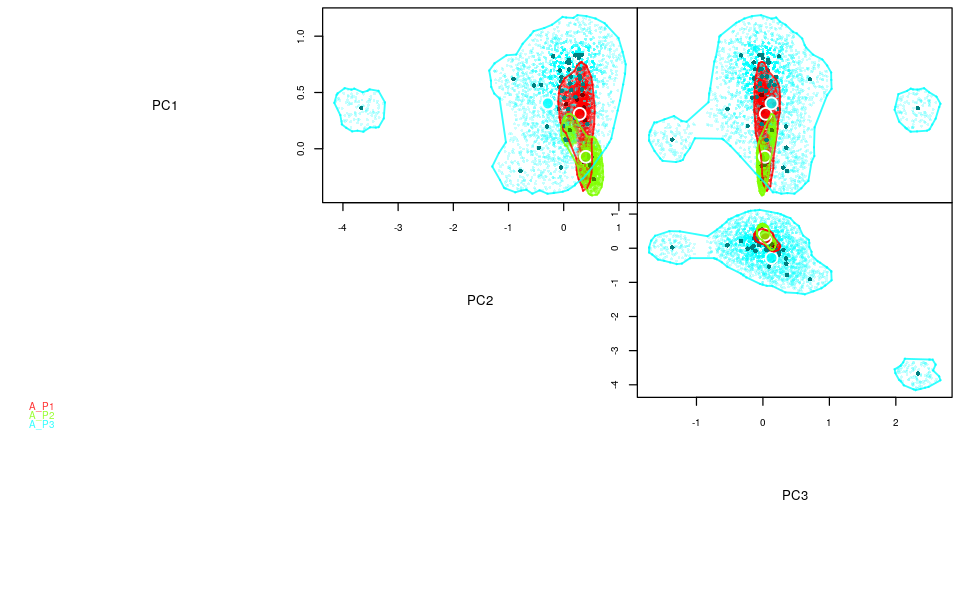

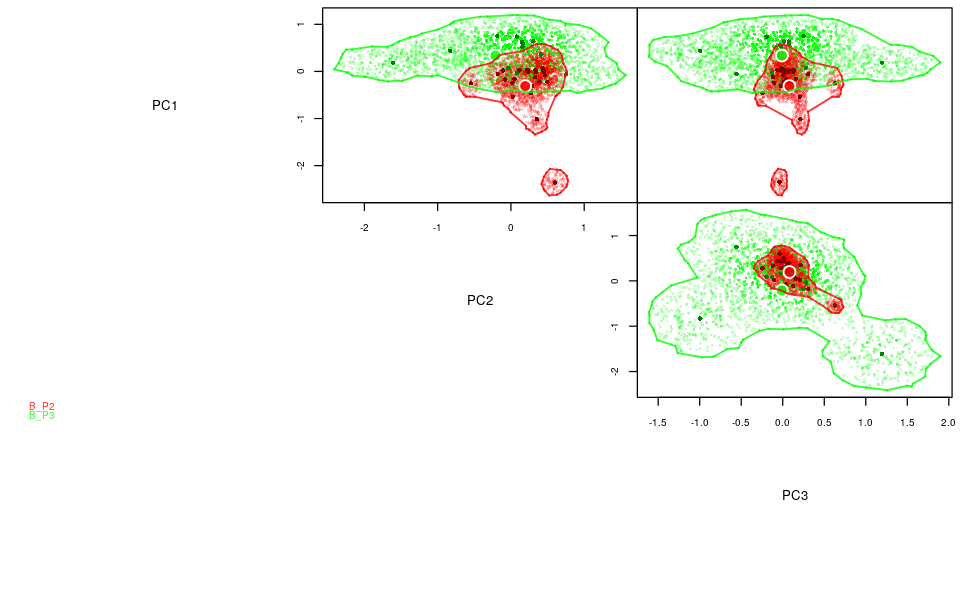

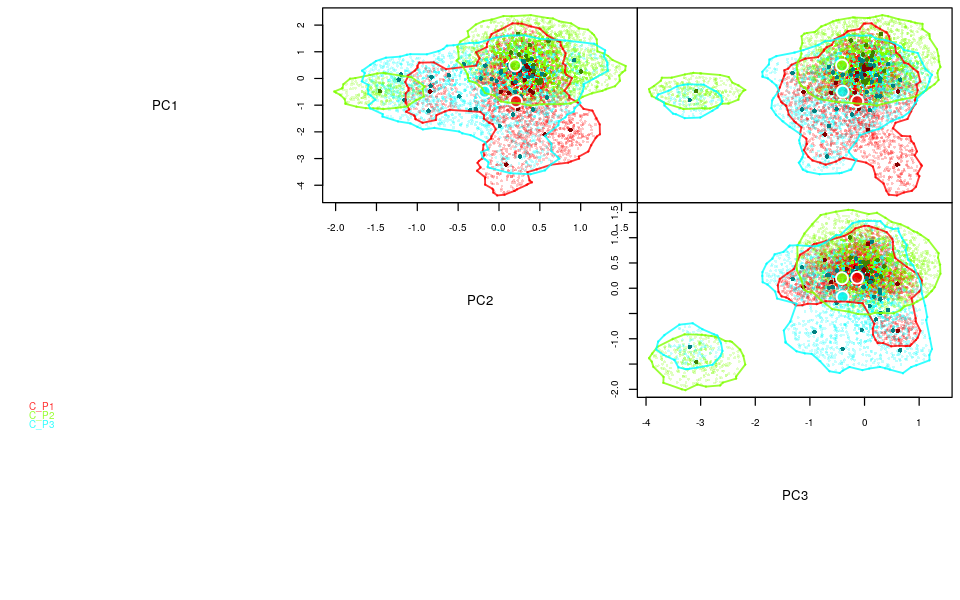

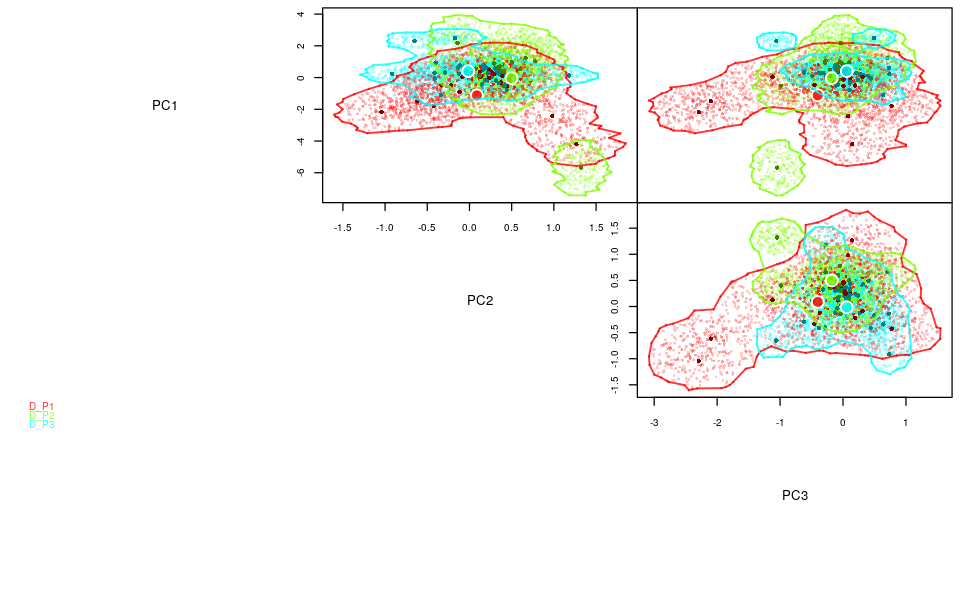

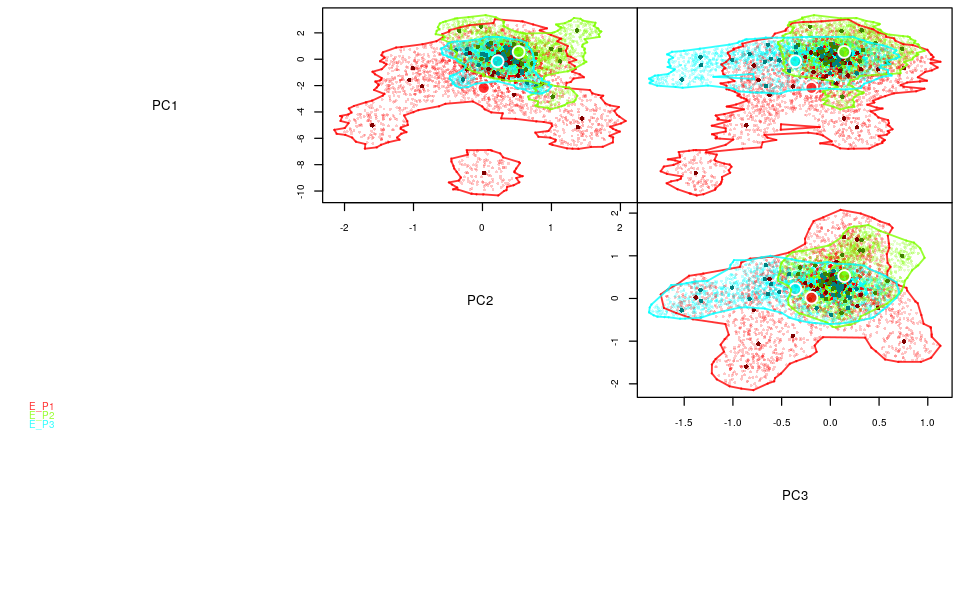

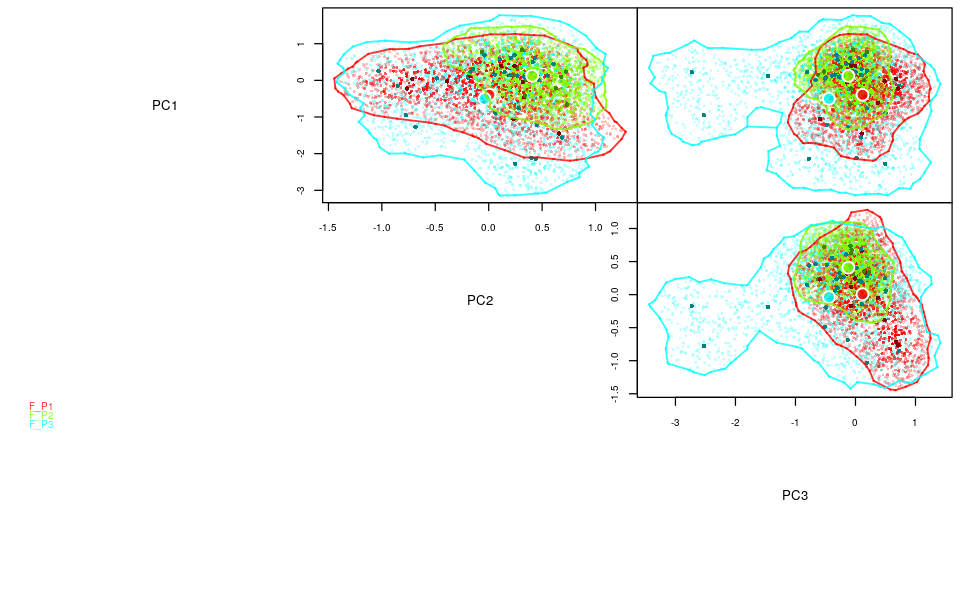

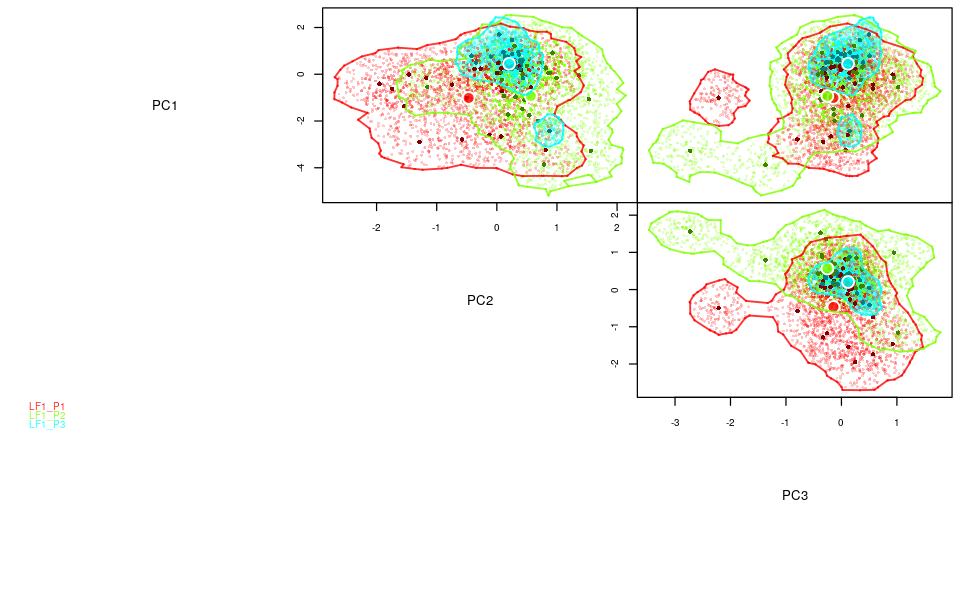

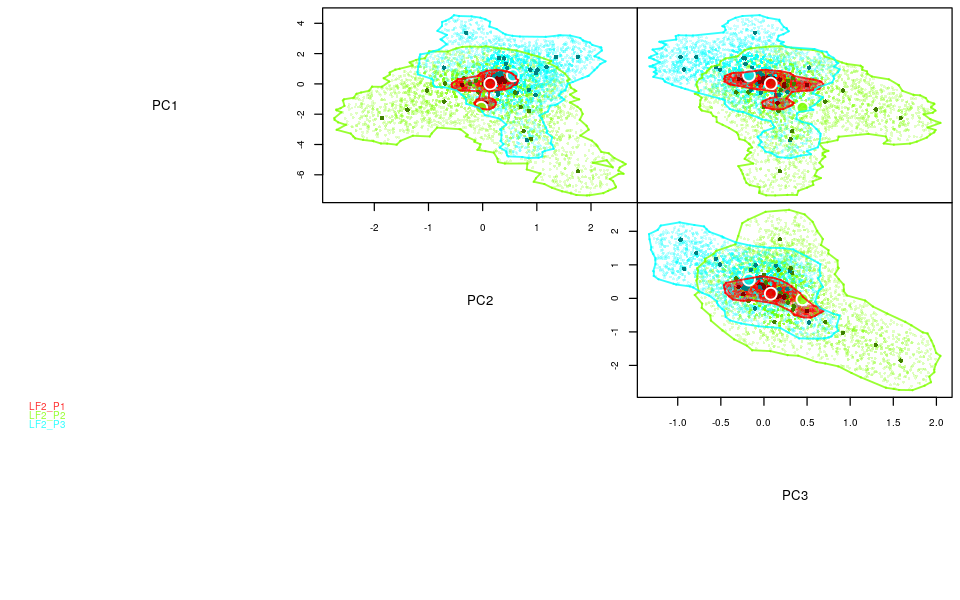

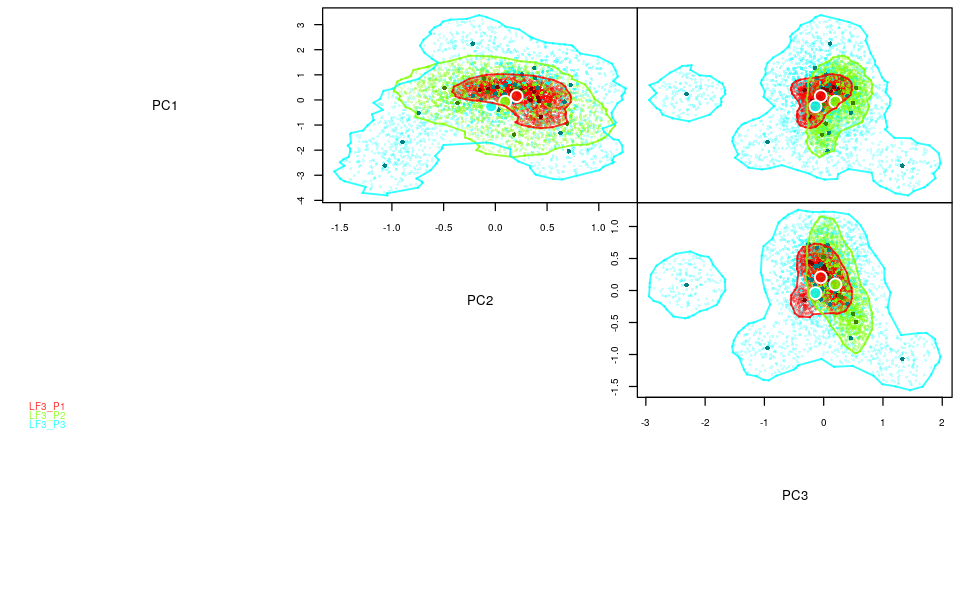

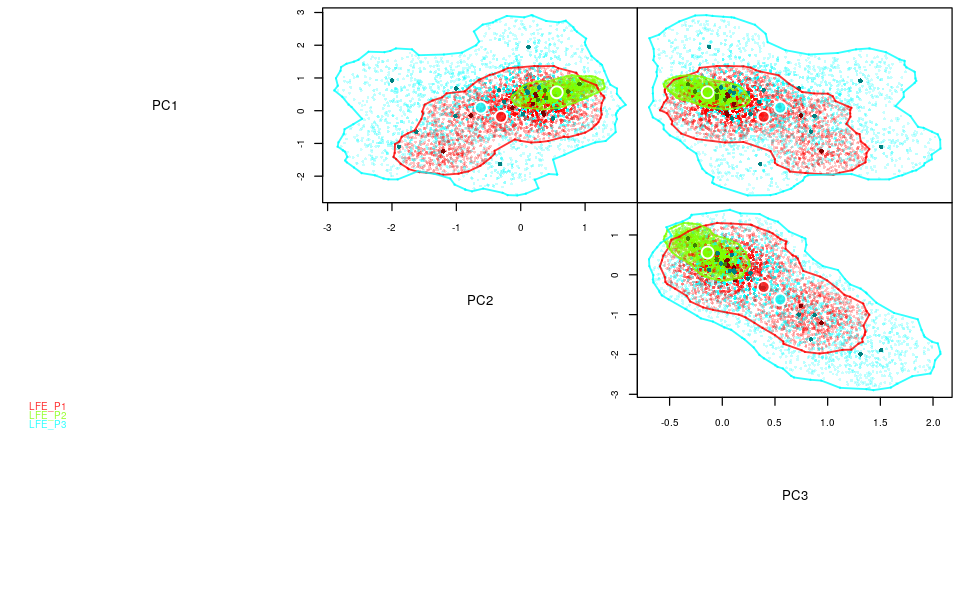

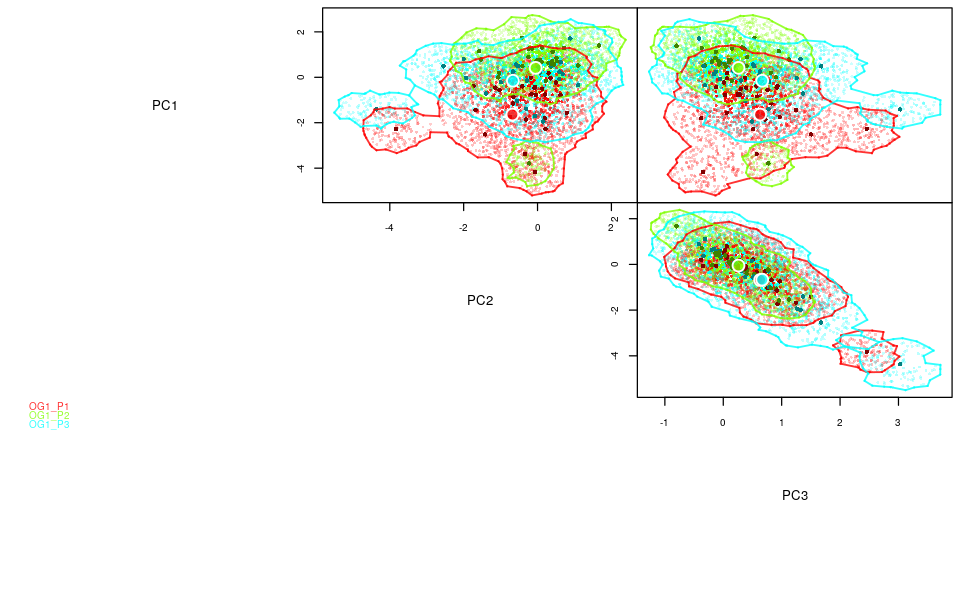

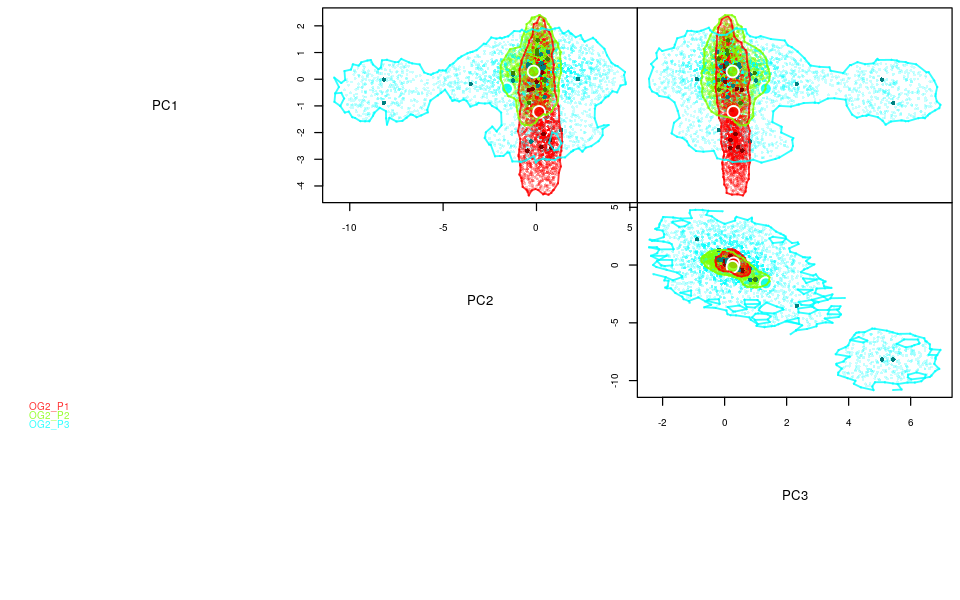

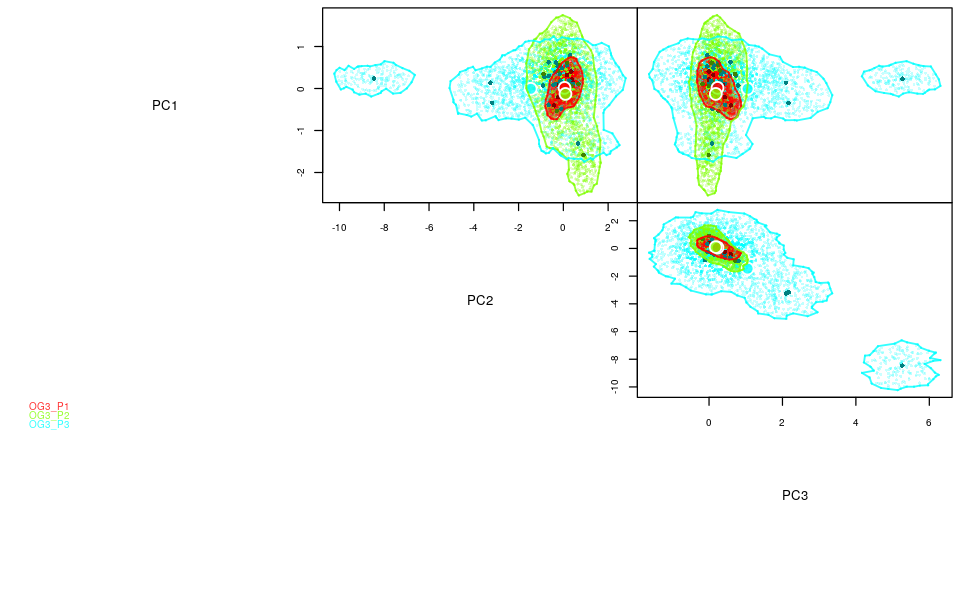

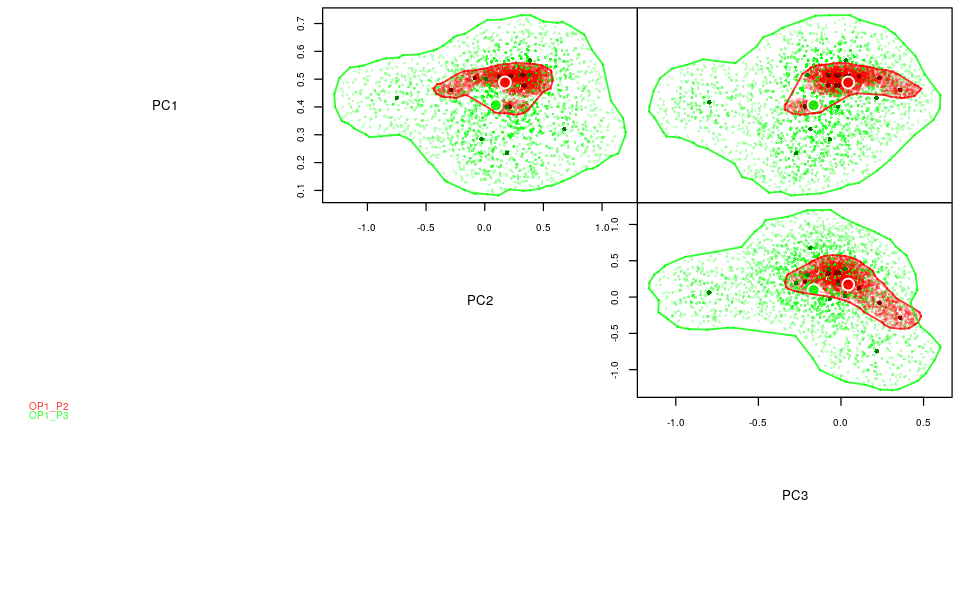

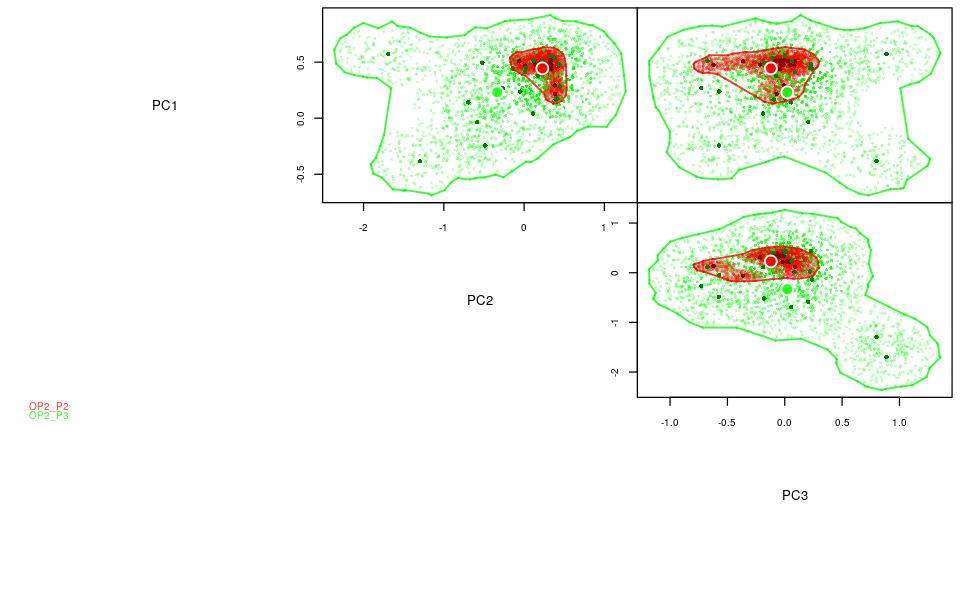

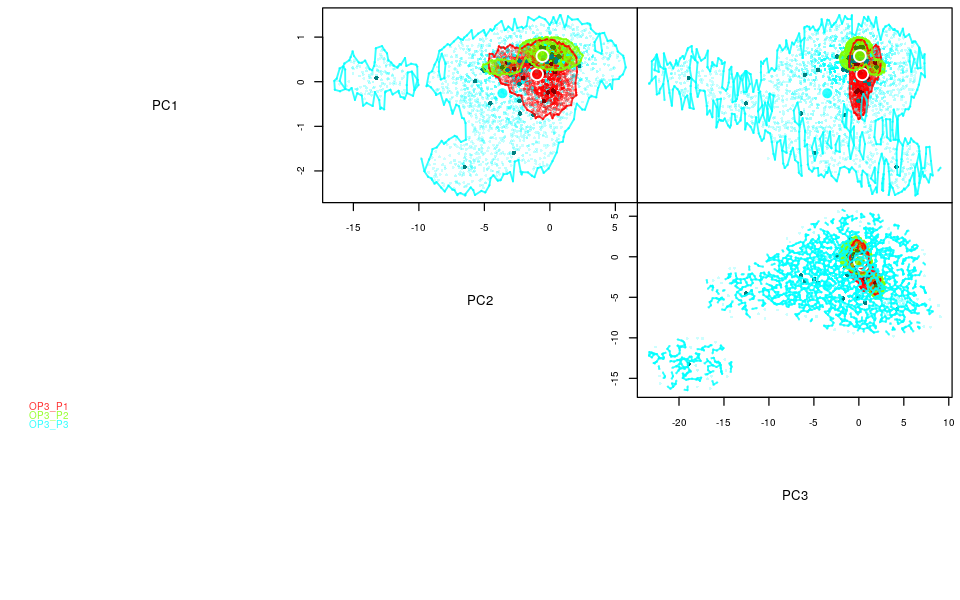

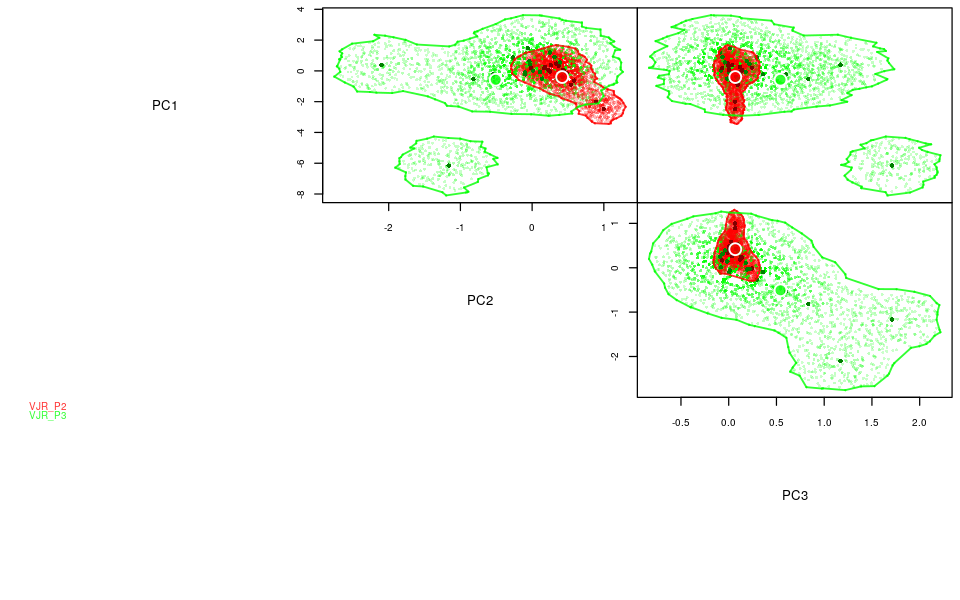

In [10]:
plot_hvs(btles_hvs_p)
#plot_hvs(mamls_hvs)
#plot_hvs(trees_hvs_p)

In [ ]:
# playing around to make the plots look pretty
plot_hvs <- function(hvs.rslts, plt){

    match_plt <- which(unlist(strsplit(names(hvs.rslts@hvlist), "_"))[c(T, F)] == plt)

    hvlist <- hvs.rslts@hvlist[match_plt]
    hvlist <- hvlist[which(!is.na(hvlist))]
    hvlist <- new("HypervolumeList", HVList = hvlist)

    plot(hvlist,
        contour.lwd    = 1,
        contour.type   = "kde",
        #contour.kde.level = 0.001,
        show.centroid = F,
         show.density = T,
        cex.centroid  = 2,
        cex.random    = 0.3,
        cex.data      = 1,
        cex.axis      = 1,
        point.dark.factor = 0,
        colors = brewer.pal(max(c(length(match_plt), 3)), "Set2")
        )
}


### compare hypervolumes

In [96]:
kind = "pca"  # "zifa"

In [97]:
# set up dataframe for plotting
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

if(kind == "pca"){
    btles = btles_hvs_p@compare
    trees = trees_hvs_p@compare
    mamls = mamls_hvs_p@compare
    } else if (kind == "zifa"){
    btles = btles_hvs_z@compare
    trees = trees_hvs_z@compare
    mamls = mamls_hvs_z@compare
    } else {cat("kind not defined")}

    
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

ovlp = rbind(trees, btles, mamls)
ovlp = ovlp[complete.cases(ovlp), ]
ovlp$taxa = as.factor(ovlp$taxa)

ovlp$agb = ovlp$agb*16
ovlp$logagb = log(ovlp$agb)

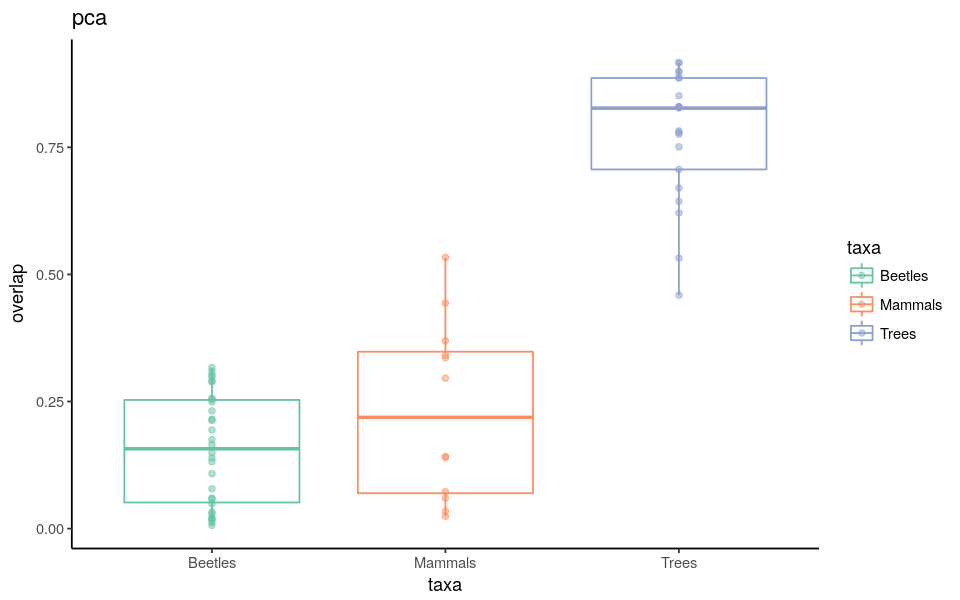

In [98]:
# boxplot
plt = ggplot(data = ovlp, aes(x = taxa, y = overlap, color = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

In [99]:
fit = aov(overlap ~ taxa, data = ovlp)
summary(fit)
TukeyHSD(fit)

            Df Sum Sq Mean Sq F value Pr(>F)    
taxa         2  5.058  2.5291   151.1 <2e-16 ***
Residuals   60  1.004  0.0167                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = overlap ~ taxa, data = ovlp)

$taxa
                     diff         lwr       upr     p adj
Mammals-Beetles 0.0768959 -0.02930284 0.1830946 0.1988724
Trees-Beetles   0.6200382  0.53157540 0.7085010 0.0000000
Trees-Mammals   0.5431423  0.43062934 0.6556553 0.0000000


In [100]:
# overlap by agb
plt = ggplot(data = ovlp, aes(x = agb, y = overlap, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
#print(plt)

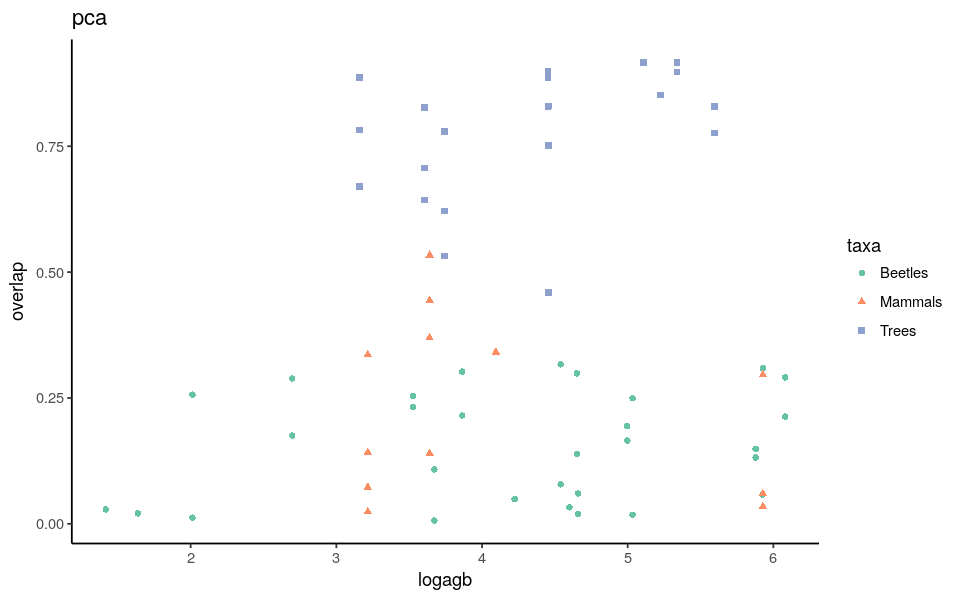

In [101]:
# overlap by log(agb)
plt = ggplot(data = ovlp, aes(x = logagb, y = overlap, color = taxa, shape = taxa))
plt = plt + geom_point()
#plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

In [102]:
# model
model = lm(overlap ~ logagb*taxa, data = ovlp)
model2 = aov(overlap ~ logagb*taxa, data = ovlp)
#anova(model)
summary(model)
#summary(model2)
#plot(model)


Call:
lm(formula = overlap ~ logagb * taxa, data = ovlp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32610 -0.10426  0.01851  0.09856  0.28396 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.09011    0.07772   1.159   0.2511  
logagb              0.01550    0.01753   0.884   0.3802  
taxaMammals         0.29057    0.16397   1.772   0.0817 .
taxaTrees           0.41785    0.17057   2.450   0.0174 *
logagb:taxaMammals -0.05154    0.03824  -1.348   0.1830  
logagb:taxaTrees    0.04668    0.03884   1.202   0.2344  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1271 on 57 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8347 
F-statistic: 63.61 on 5 and 57 DF,  p-value: < 2.2e-16


In [103]:
trees_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Trees"))
mamls_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Mammals"))
btles_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Beetles"))

In [104]:
summary(btles_mdl)


Call:
lm(formula = overlap ~ logagb, data = subset(ovlp, taxa == "Beetles"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15024 -0.10025 -0.01289  0.10157  0.15672 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.09011    0.06607   1.364    0.183
logagb       0.01550    0.01490   1.040    0.307

Residual standard error: 0.1081 on 28 degrees of freedom
Multiple R-squared:  0.03721,	Adjusted R-squared:  0.002826 
F-statistic: 1.082 on 1 and 28 DF,  p-value: 0.3071


## Spatial Stabiltiy

In [105]:
# readin and sort data
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)

trees_df = add_cols(trees_df)
mamls_df = add_cols(mamls_df)
btles_df = add_cols(btles_df)

trees = melt(trees_df, id.vars=c("plot", "subplot", "census"))
mamls = melt(mamls_df, id.vars=c("plot", "subplot", "census"))
btles = melt(btles_df, id.vars=c("plot", "subplot", "census"))

In [106]:
# calculate stability
trees_stb = spatial_stability(trees)
mamls_stb = spatial_stability(mamls)
btles_stb = spatial_stability(btles)

trees_stb$taxa = "Trees"
mamls_stb$taxa = "Mammals"
btles_stb$taxa = "Beetles"

trees_stb$plot = unlist(strsplit(trees_stb$census, "_"))[ c(T,F)]
mamls_stb$plot = unlist(strsplit(mamls_stb$census, "_"))[ c(T,F)]
btles_stb$plot = unlist(strsplit(btles_stb$census, "_"))[ c(T,F)]

Warning message in rbind(b, a):
“number of columns of result is not a multiple of vector length (arg 1)”

ERROR: Error in check_numeric(df, time.var, abundance.var): Time variable is not numeric


In [ ]:
 #merge with agb
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

colnames(trees_agb) = c("plot", "agb")
colnames(mamls_agb) = c("plot", "agb")
colnames(btles_agb) = c("plot", "agb")

trees_stb = merge(trees_stb, trees_agb, by = "plot")
mamls_stb = merge(mamls_stb, mamls_agb, by = "plot")
btles_stb = merge(btles_stb, btles_agb, by = "plot")

In [ ]:
# setup dataframe for plotting
stab = rbind(trees_stb, btles_stb, mamls_stb)
stab = stab[complete.cases(stab), ]
stab$taxa = as.factor(stab$taxa)

stab$agb = stab$agb*16
stab$logagb = log(stab$agb)

In [ ]:
# boxplot
plt = ggplot(data = stab, aes(x = taxa, y = stability, color = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stabilty")
print(plt)

In [ ]:
# stability by agb
plt = ggplot(data = stab, aes(x = agb, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
#print(plt)

In [ ]:
# stabiluty by log(agb)
plt = ggplot(data = stab, aes(x = logagb, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
print(plt)

In [107]:
# model
model = lm(stability ~ logagb*taxa, data = stab)
anova(model)
summary(model)

trees_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Trees"))
mamls_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Mammals"))
btles_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Beetles"))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logagb,1,4.79444,4.794440,11.89832,8.569454e-04
taxa,2,43.86124,21.930618,54.42502,3.215564e-16
logagb:taxa,2,18.56133,9.280667,23.03175,8.366419e-09
Residuals,90,36.26559,0.402951,NA,NA



Call:
lm(formula = stability ~ logagb * taxa, data = stab)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7417 -0.2500 -0.0608  0.1481  5.3468 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.39662    0.30032   4.651 1.13e-05 ***
logagb             -0.02229    0.06838  -0.326    0.745    
taxaMammals         0.22360    0.64755   0.345    0.731    
taxaTrees          -3.06913    0.70287  -4.367 3.37e-05 ***
logagb:taxaMammals  0.04289    0.15001   0.286    0.776    
logagb:taxaTrees    1.06249    0.15847   6.705 1.72e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6348 on 90 degrees of freedom
Multiple R-squared:  0.6495,	Adjusted R-squared:  0.6301 
F-statistic: 33.36 on 5 and 90 DF,  p-value: < 2.2e-16


In [108]:
summary(trees_mdl)


Call:
lm(formula = stability ~ agb, data = subset(stab, taxa == "Trees"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58777 -0.32799 -0.04421  0.18377  0.79186 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.7849361  0.1202286   14.85 8.44e-15 ***
agb         0.0101079  0.0008922   11.33 5.71e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3956 on 28 degrees of freedom
Multiple R-squared:  0.8209,	Adjusted R-squared:  0.8145 
F-statistic: 128.4 on 1 and 28 DF,  p-value: 5.712e-12


## hypervolumes vs spatial stabiltiy

In [109]:
test = ovlp %>% group_by("plot") %>%
    summarize(
        overlap = mean(overlap),
        )

In [110]:
a = ovlp %>% 
    group_by(plot, taxa) %>% summarise(overlap = mean(overlap))

In [111]:
b = stab %>% 
    group_by(plot, taxa) %>% summarise(stability = mean(stability))

In [112]:
c = merge(a, b, by = c("plot", "taxa"))

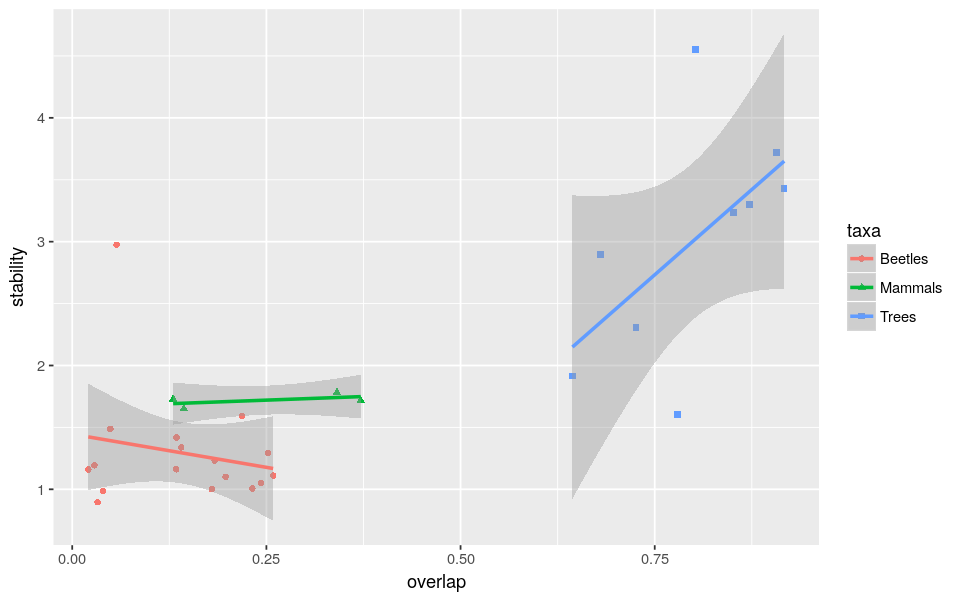

In [113]:
plt = ggplot(data = c, aes(x = overlap, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point()
plt = plt + geom_smooth(method = 'lm')
print(plt)